In [8]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.spatial.distance import euclidean

In [4]:
# Loading in data
spotify_df = pd.read_csv('spotifytoptracks.csv')
# Making sure I'll be able to see all of the columns
pd.options.display.max_columns = None

## Initial Analysis

In [5]:
def initial_analysis(df):
    """
    Runs several pandas functions for initial analysis.
    """
    display(df.shape)
    display(df.head())
    display(df.tail())
    display(df.columns)
    display(df.info())
    [print(f'{i} contains {df[i].nunique()} unique values') for i in df.columns]
    [print(f'The dataframe contains {df.duplicated().sum()} duplicated values')]
    display(df.describe())

In [6]:
initial_analysis(spotify_df)

(50, 17)

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
45,45,Juice WRLD,Goodbye & Good Riddance,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,0.566,0.511,6,-7.230,0.34900,0.2000,0.000000,0.340,0.218,83.903,239836,Pop
46,46,Ariana Grande,Stuck with U,Stuck with U (with Justin Bieber),4HBZA5flZLE435QTztThqH,0.450,0.597,8,-6.658,0.22300,0.0418,0.000000,0.382,0.537,178.765,228482,Pop
47,47,JP Saxe,If the World Was Ending (feat. Julia Michaels),If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,0.473,0.464,1,-10.086,0.86600,0.1290,0.000000,0.109,0.604,75.801,208687,Pop
48,48,Dua Lipa,Future Nostalgia,Physical,3AzjcOeAmA57TIOr9zF1ZW,0.844,0.647,0,-3.756,0.01370,0.0457,0.000658,0.102,0.746,146.967,193829,Dance/Electronic
49,49,Travis Scott,ASTROWORLD,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,0.730,0.834,8,-3.714,0.00513,0.2220,0.000000,0.124,0.446,155.008,312820,Hip-Hop/Rap


Index(['Unnamed: 0', 'artist', 'album', 'track_name', 'track_id', 'energy',
       'danceability', 'key', 'loudness', 'acousticness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'genre'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   track_id          50 non-null     object 
 5   energy            50 non-null     float64
 6   danceability      50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   acousticness      50 non-null     float64
 10  speechiness       50 non-null     float64
 11  instrumentalness  50 non-null     float64
 12  liveness          50 non-null     float64
 13  valence           50 non-null     float64
 14  tempo             50 non-null     float64
 15  duration_ms       50 non-null     int64  
 16  genre             50 non-null     object 
dtyp

None

Unnamed: 0 contains 50 unique values
artist contains 40 unique values
album contains 45 unique values
track_name contains 50 unique values
track_id contains 50 unique values
energy contains 49 unique values
danceability contains 48 unique values
key contains 12 unique values
loudness contains 50 unique values
acousticness contains 49 unique values
speechiness contains 48 unique values
instrumentalness contains 19 unique values
liveness contains 47 unique values
valence contains 47 unique values
tempo contains 50 unique values
duration_ms contains 50 unique values
genre contains 16 unique values
The dataframe contains 0 duplicated values


,Unnamed: 0,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,14.57738,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.00000,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,12.25000,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,24.50000,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,36.75000,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,49.00000,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


> The data is largely clean with no duplicates, correct data types, no null values, and nothing that looks super out of place upon initial inspection. 

> We have 16 features, 5 of them categorical and 11 of them numerical. 

> There are only two things I want to change. First, the Unnamed:0 column, renaming it to make it clearer and changing all the values by 1 to state their order. Second, removing the track_id column as it's not relevant to the analysis. I'll also add a column to see the duration in minutes and seconds, as I believe this will be more intuitive when looking at song durations.  

## Data Cleaning

Issues 
- "Unnamed:0" column unclear
- values in Unnamed:0 column unclear 
- column is numeric
- track_id column is no relevant to analysis
- duration in ms is not intuitive 

Solutions 
- rename Unnamed:0 column
- change values in Unnamed:0 column
- change column data type 
- remove track_id column
- add duration in minutes and seconds columns


In [7]:
# making a copy of our original dataframe 
spotify_to_clean = spotify_df.copy()

In [15]:
# renaming "Unnamed:0" column
spotify_to_clean = spotify_to_clean.rename(columns={"Unnamed: 0": "rank"})

In [28]:
# changing rank column data type 
spotify_to_clean['rank'] = spotify_to_clean['rank'].astype(str)


In [16]:
# changing values in our new rank column
spotify_to_clean['rank'] = spotify_to_clean['rank'] + 1

In [23]:
# removing track_id column
spotify_to_clean = spotify_to_clean.drop('track_id', axis=1)

In [18]:
# adding duration in minutes and seconds column 
spotify_to_clean['duration_min_sec'] = pd.to_datetime(spotify_to_clean['duration_ms'], unit='ms').dt.strftime('%M:%S')

In [24]:
# testing to see how everything looks together 
spotify_to_clean.head()

,rank,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre,duration_min_sec
0,1,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul,03:20
1,2,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie,03:29
2,3,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap,03:16
3,4,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic,02:56
4,5,Dua Lipa,Future Nostalgia,Don't Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco,03:03


In [29]:
spotify_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              50 non-null     object 
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
 16  duration_min_sec  50 non-null     object 
dtyp

In [30]:
# exporting our clean dataset
spotify_to_clean.to_csv(r'spotifytoptracks_clean.csv', index=False, header=True)

In [5]:
# importing our clean dataset
spotify_df = pd.read_csv('spotifytoptracks_clean.csv')
pd.options.display.max_columns = None

In [32]:
spotify_df.head()

,rank,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre,duration_min_sec
0,1,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul,03:20
1,2,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie,03:29
2,3,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap,03:16
3,4,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic,02:56
4,5,Dua Lipa,Future Nostalgia,Don't Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco,03:03


## Outlier Detection

Let's define the columns that we'll run outlier detection on: 

- 'energy',
       'danceability', 'key', 'loudness', 'acousticness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'

In [33]:
# Creating a function to make it easier to call the two plots I want to look at for outliers
def outlier_plot(df, x, box_title=None, hist_title=None, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(2, 1, figsize=(18,10))
    ax = sns.boxplot(x=x,
            data=df, 
            color="blue",
            ax=ax[0])
    ax.set_title(box_title, fontdict={'size': 13, 'weight': 'semibold'})
    ax.set_xlabel(xlabel, fontweight ='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax1 = sns.histplot(x=x,
                  data=df,
                  kde=True,
                  color="blue")
    ax1.set_title(hist_title, fontdict={'size': 13, 'weight': 'semibold'})
    ax1.set_xlabel(xlabel, 
               fontweight ='bold')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

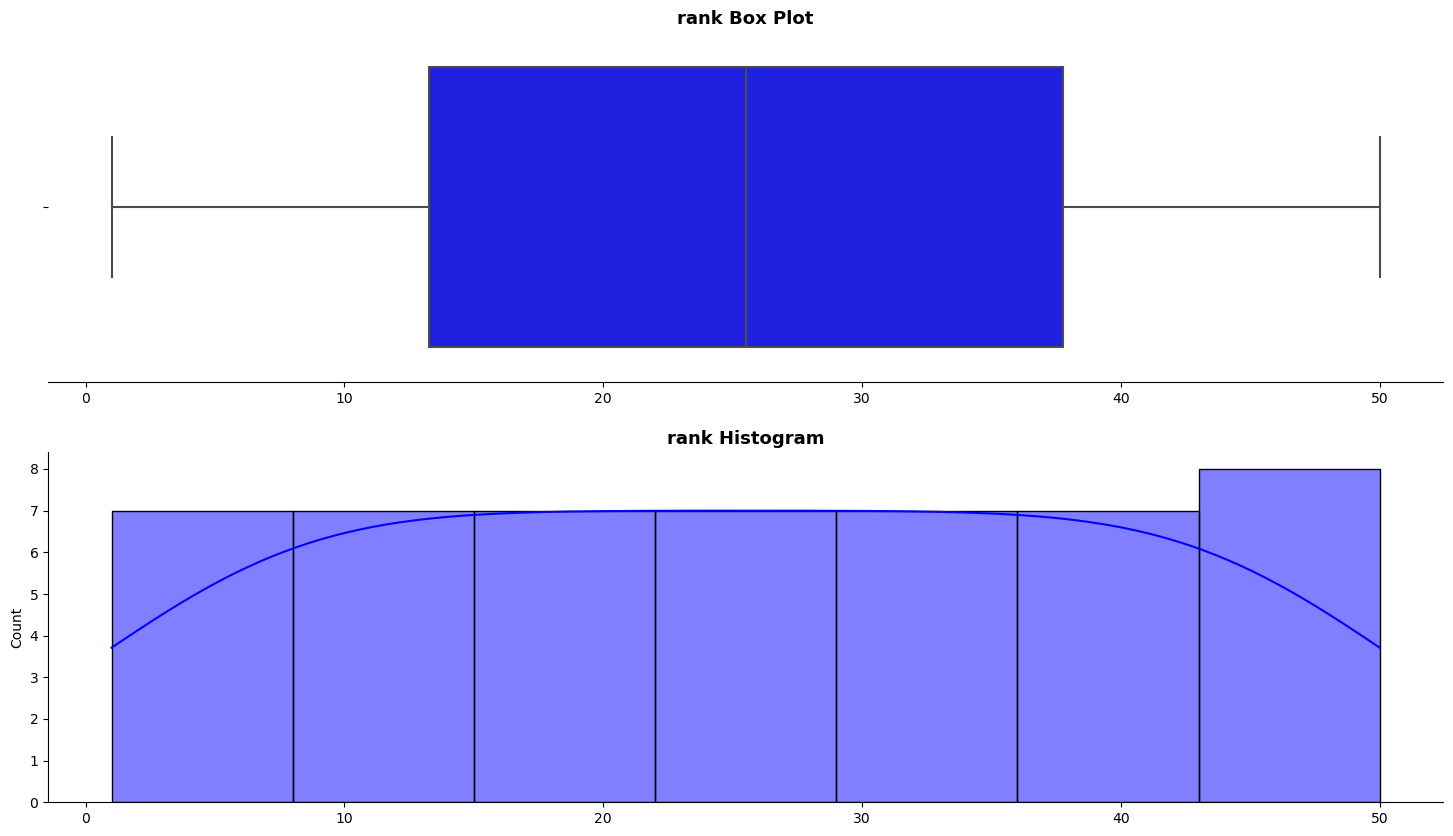

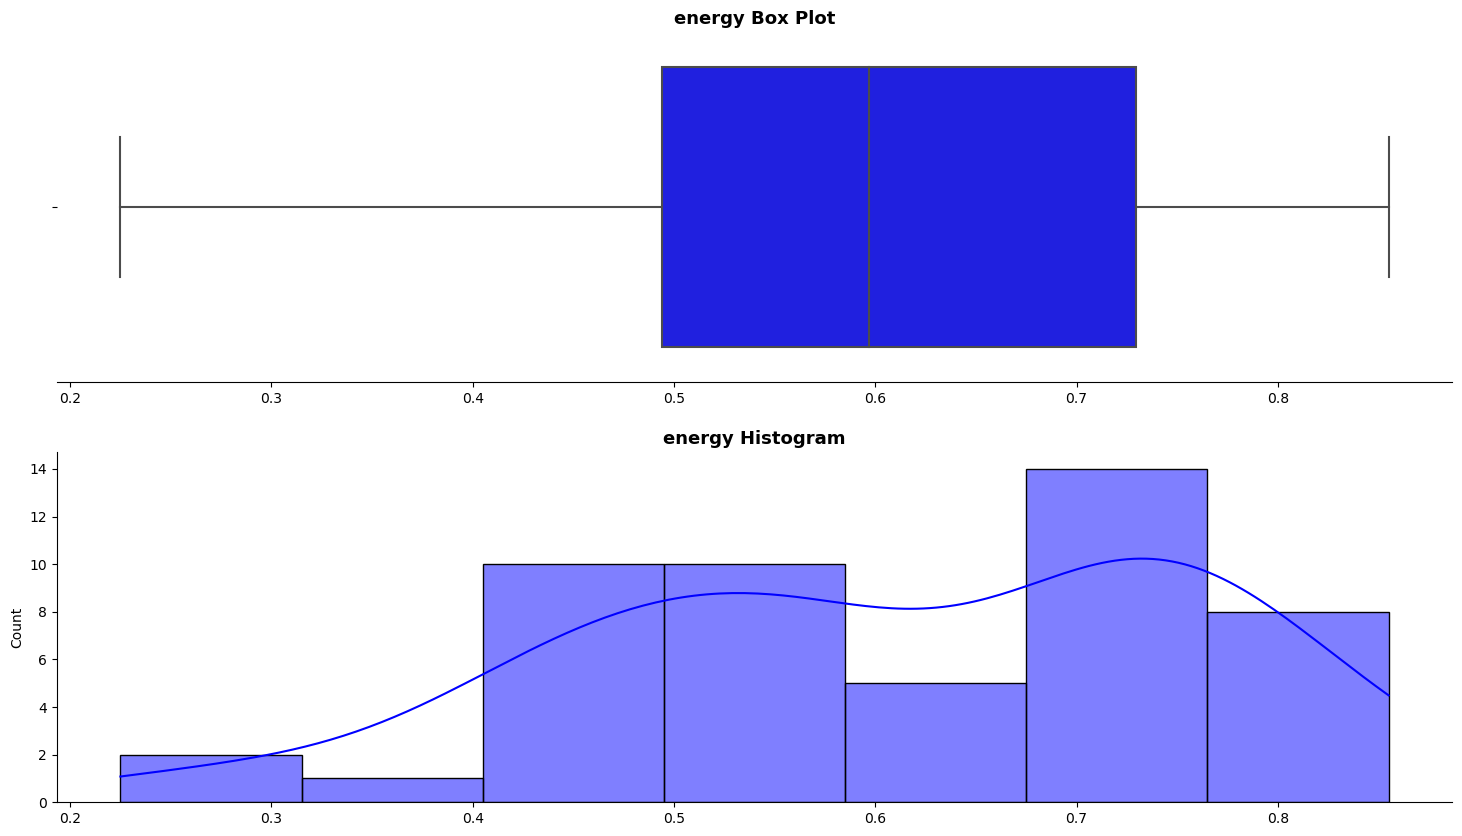

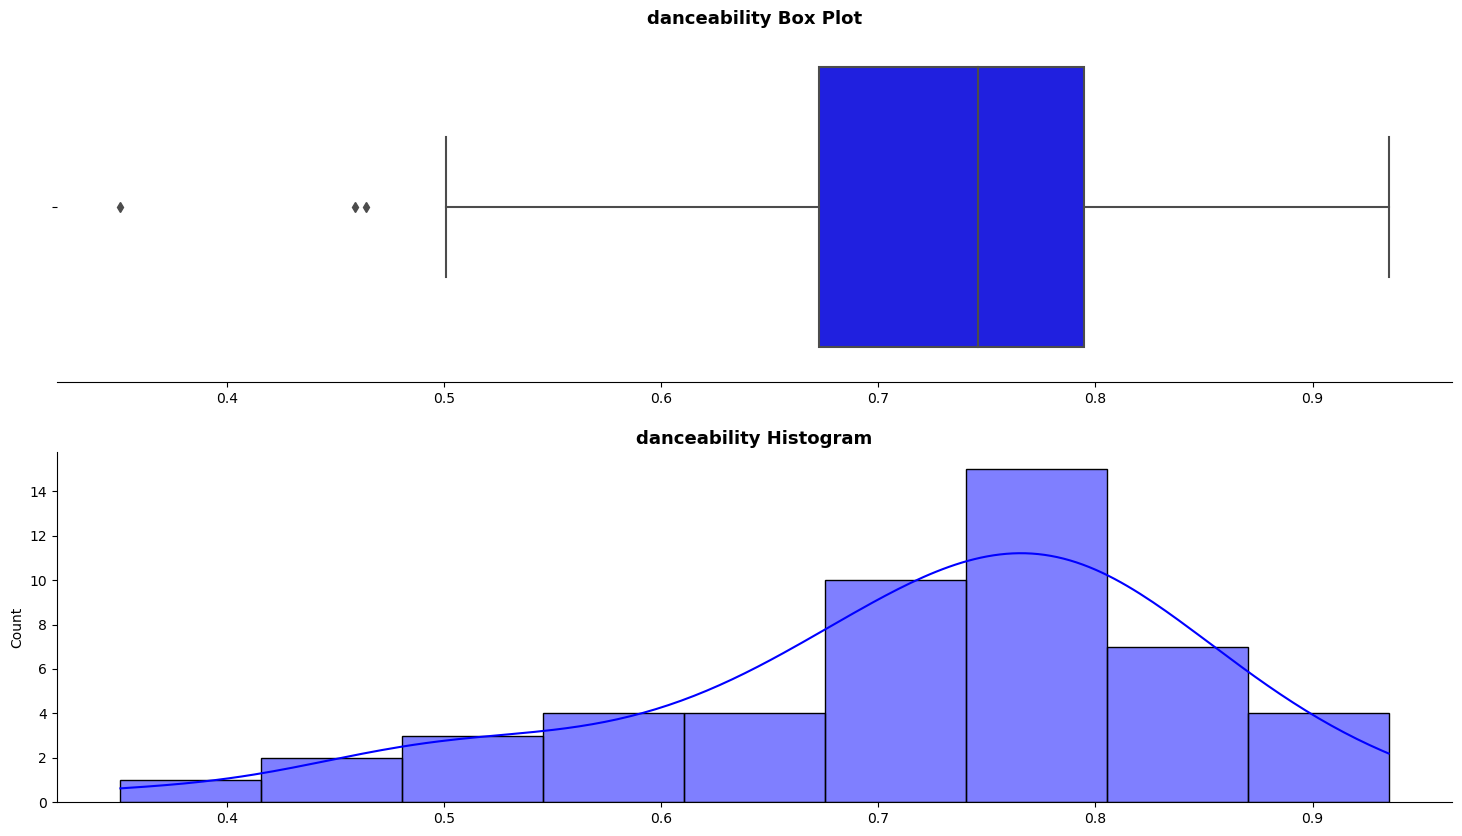

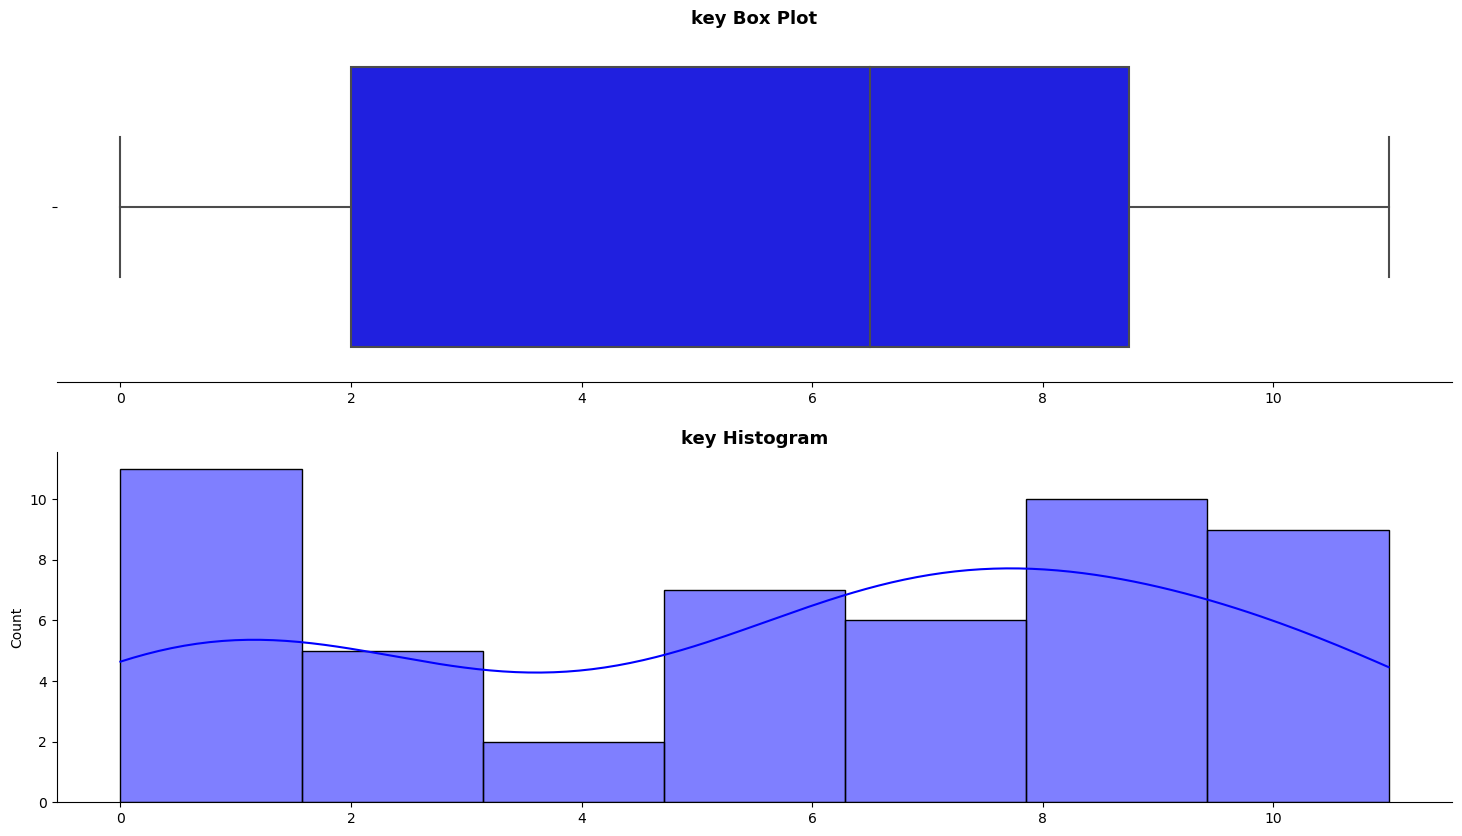

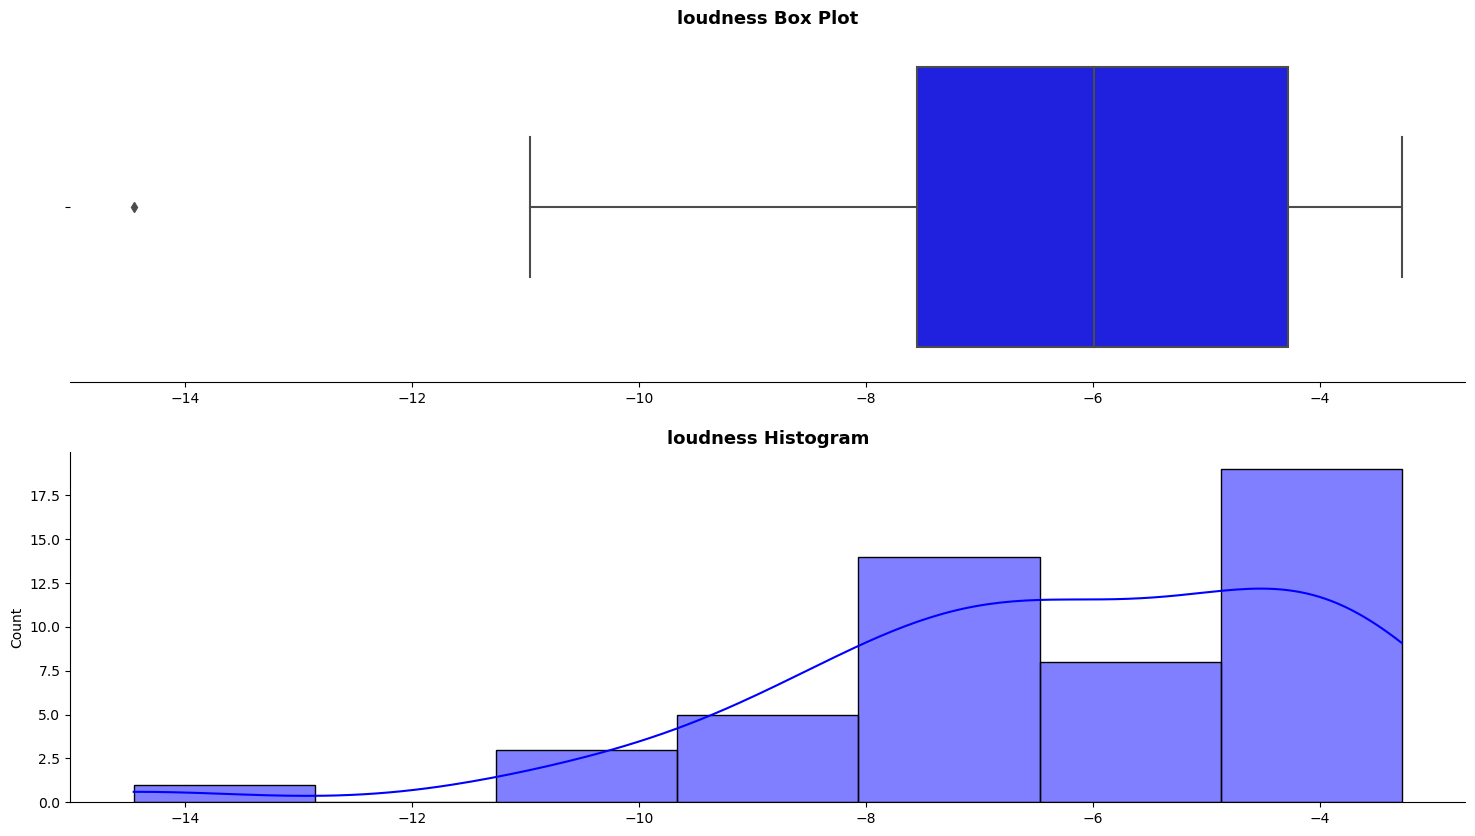

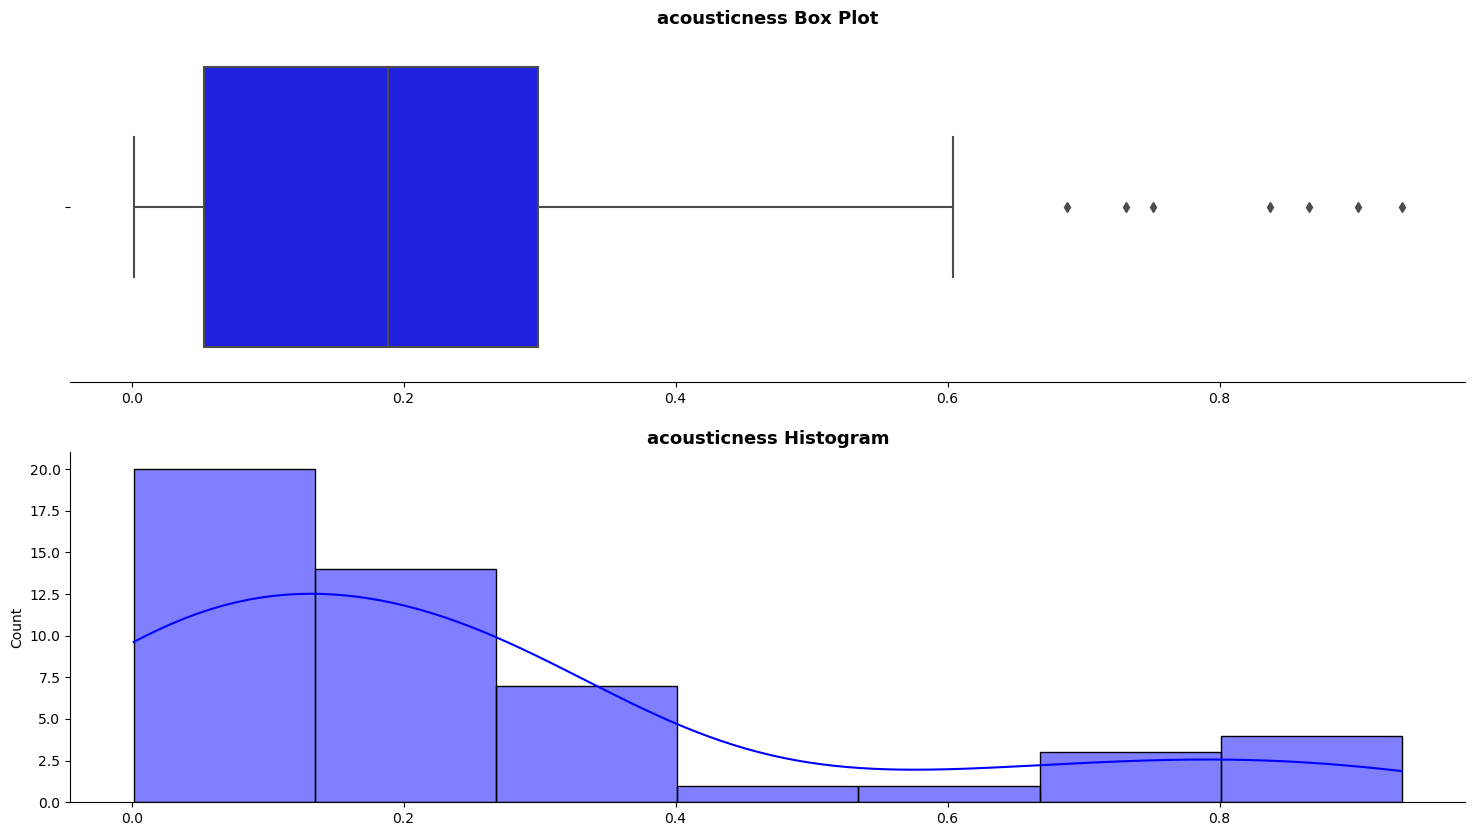

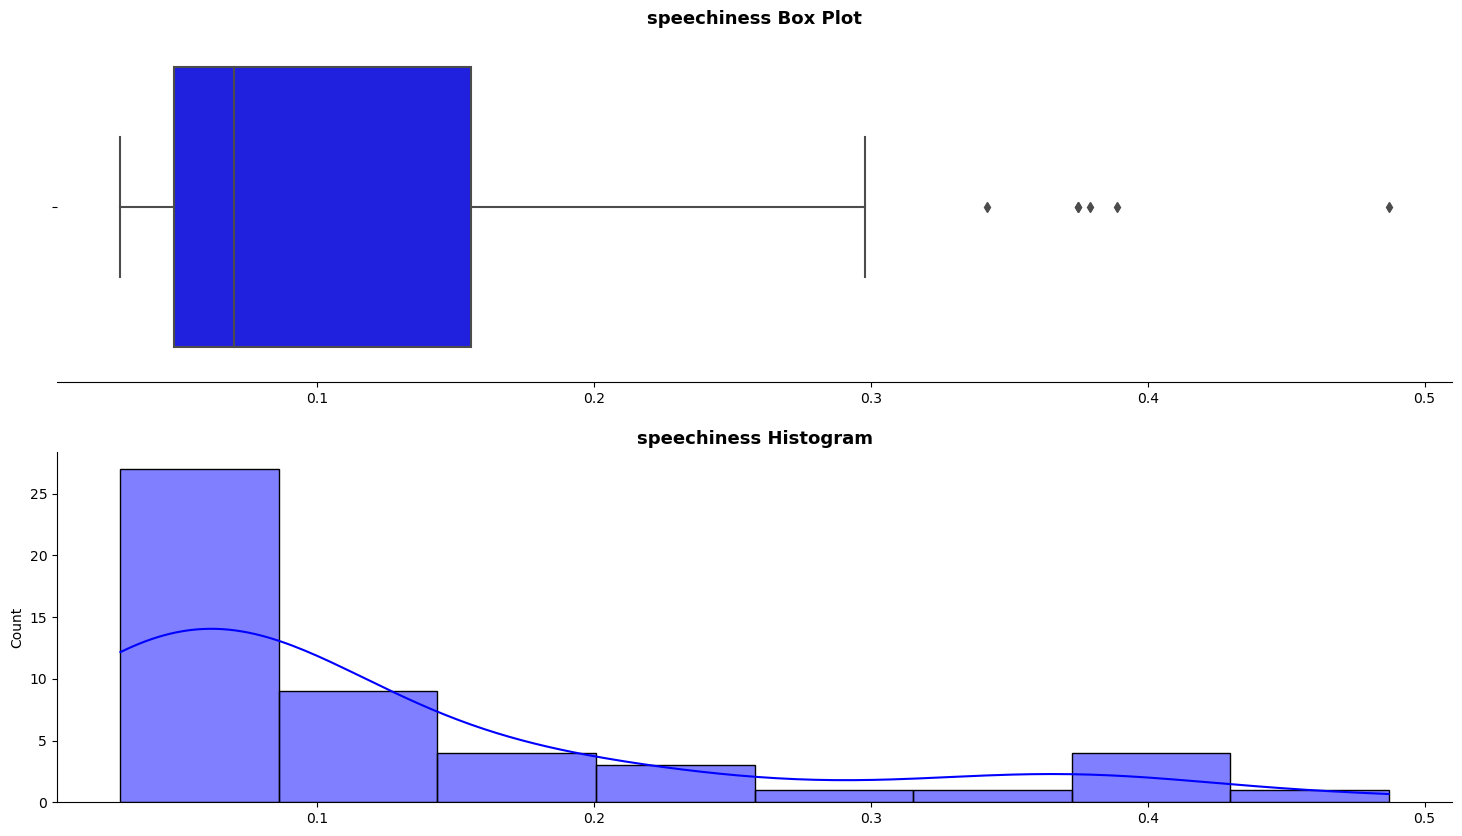

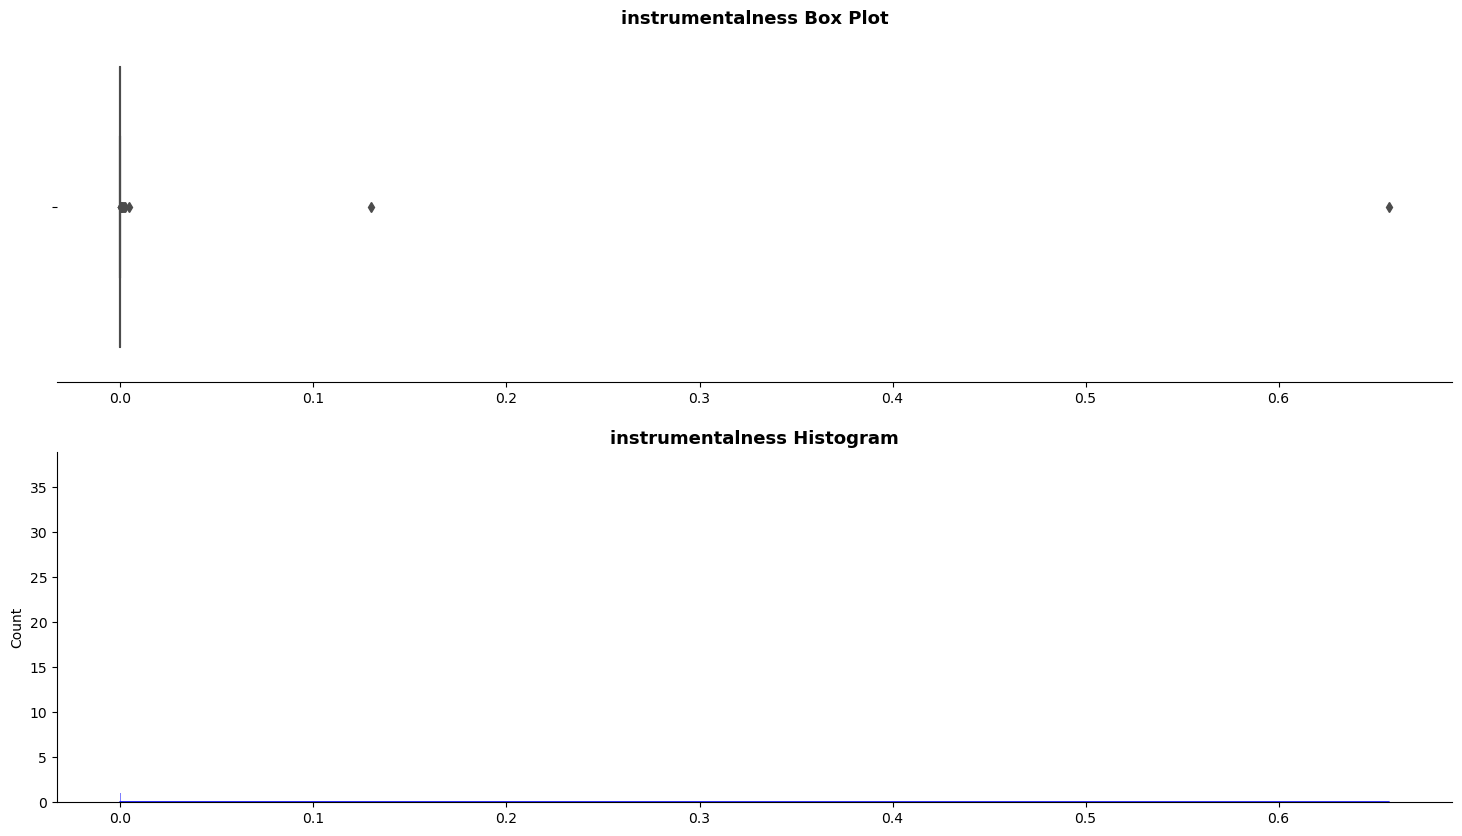

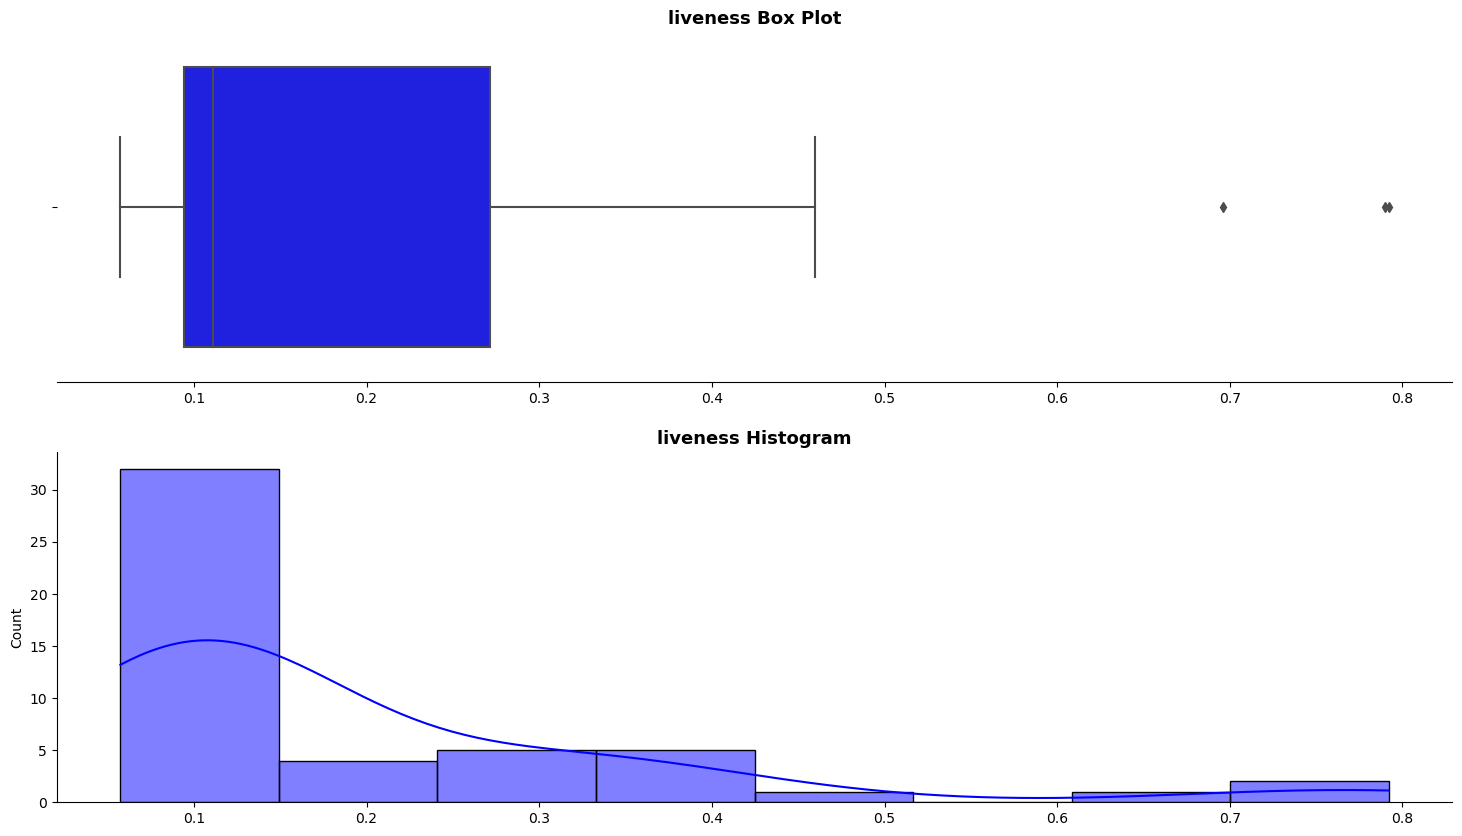

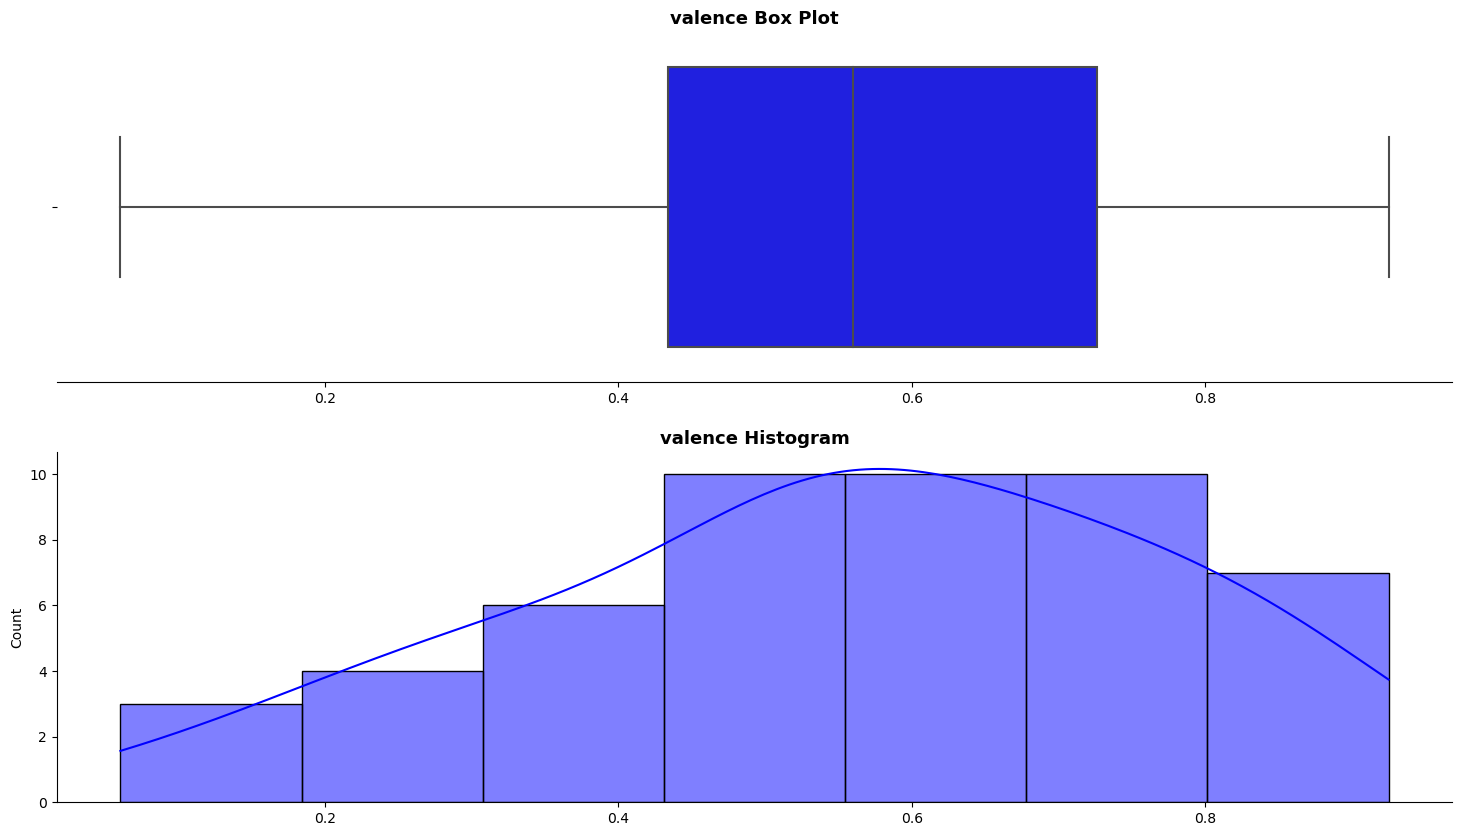

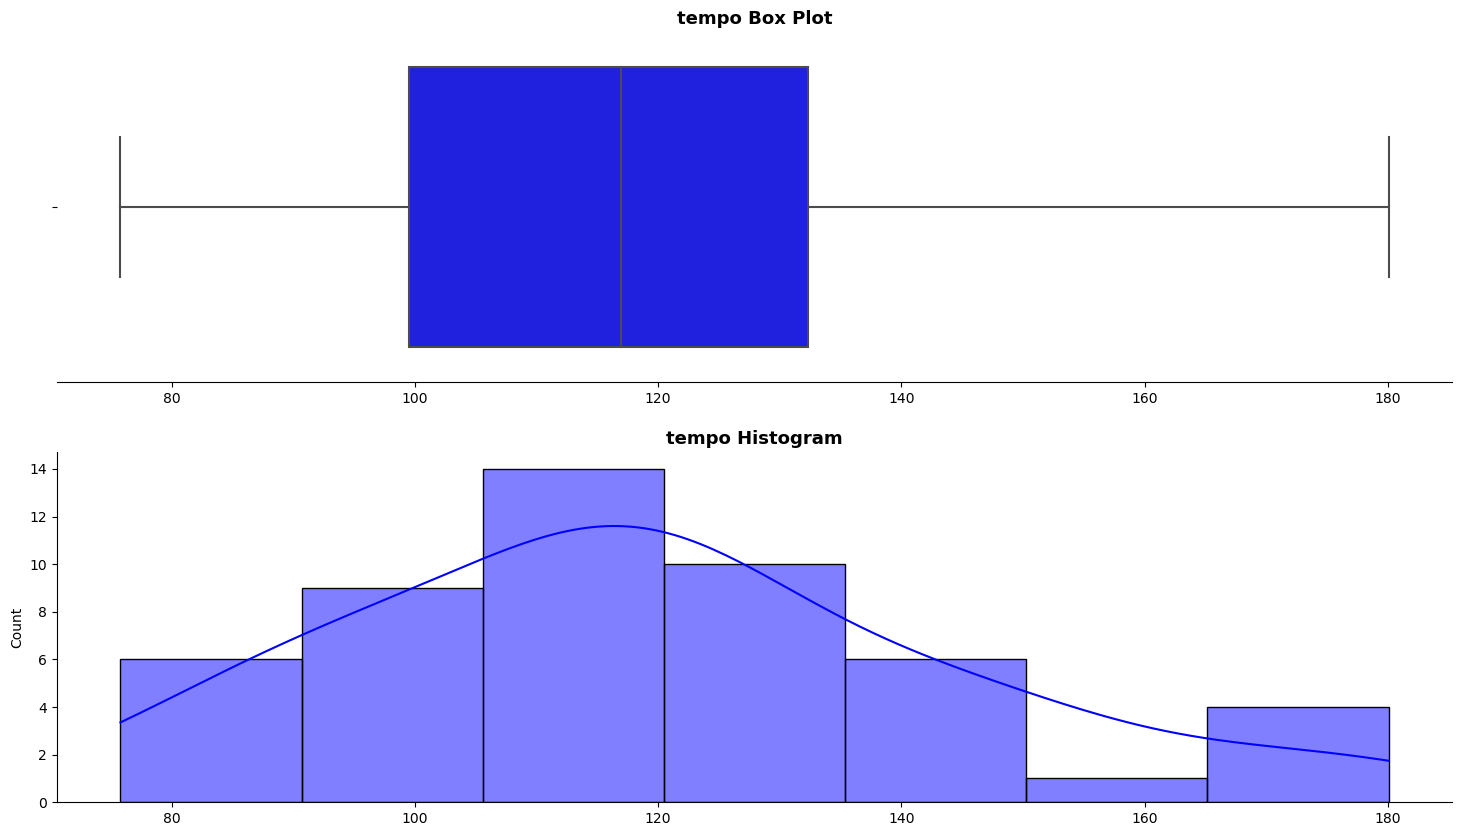

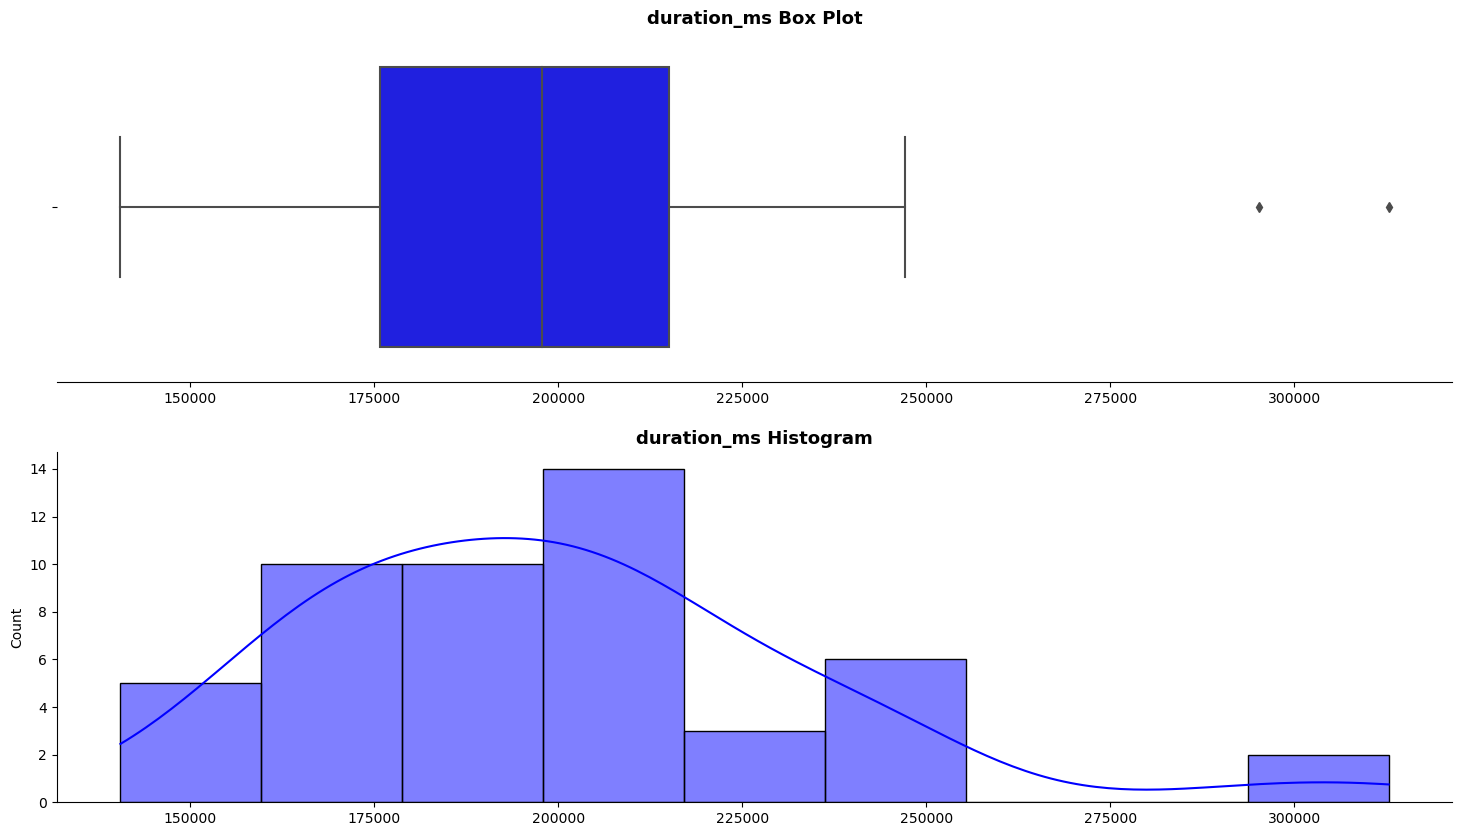

In [37]:
# Check for numeric columns and run the plots in a loop
for i in spotify_df.columns:
    if spotify_df[f'{i}'].dtypes == 'float64' or spotify_df[f'{i}'].dtypes == 'int64':
         outlier_plot(spotify_df, x=(f'{i}'), 
                 box_title=(f'{i} Box Plot'), 
                 hist_title=(f'{i} Histogram'))

> I see that there are outliers in the majority of columns: 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', and 'duration_ms'. With the most extreme outliers belonging to instrumentalness. Seeing as my intention is to understand and uncover the differences or similarities that lead a song to being included in this ranking, I don't want to remove any outliers. It could be interesting later on to see if there are differences between the top 25 and the bottom 25, but for now, I want to keep all of the songs on the list. 

## Univariate

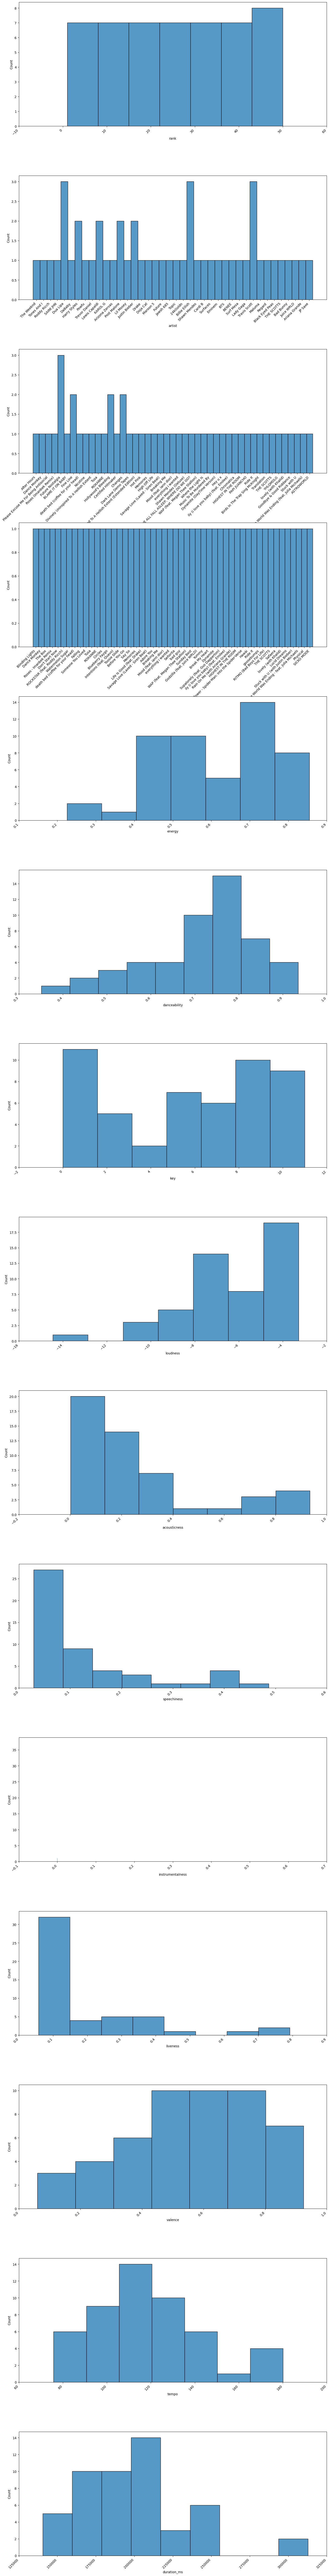

In [70]:
fig, ax = plt.subplots(15, 1, figsize=(17,12))
plt.subplots_adjust(left=None, bottom=.9, right=None, top=10, wspace=0.3, hspace=0.4)
for variable, subplot in zip(spotify_df.columns, ax.flatten()):
  sns.histplot(spotify_df[variable], ax=subplot)
  subplot.set_xticks(subplot.get_xticks())
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45, ha='right')

In [20]:
# Tracks with danceability score above 0.7
tracks_danceability_above_07 = spotify_df[spotify_df['danceability'] > 0.7][['artist', 'track_name']]

print(f"There are 33 tracks with a danceability above .07: \n {tracks_danceability_above_07}") 

There are 33 tracks with a danceability above .07: 
              artist                                     track_name
1       Tones And I                                   Dance Monkey
2       Roddy Ricch                                        The Box
3         SAINt JHN                          Roses - Imanbek Remix
4          Dua Lipa                                Don't Start Now
5            DaBaby                   ROCKSTAR (feat. Roddy Ricch)
7             Powfu               death bed (coffee for your head)
8     Trevor Daniel                                        Falling
10          KAROL G                                           Tusa
13        Lil Mosey                                Blueberry Faygo
14    Justin Bieber                       Intentions (feat. Quavo)
15            Drake                                   Toosie Slide
17         Doja Cat                                         Say So
18         Maroon 5                                       Memories
19       

In [19]:
# Tracks with danceability score below 0.4
tracks_danceability_below_04 = spotify_df[spotify_df['danceability'] < 0.4][['artist', 'track_name']]

print(f"Here are the tracks with a danceability below .04: \n {tracks_danceability_below_04}") 

Here are the tracks with a danceability below .04: 
            artist            track_name
44  Billie Eilish  lovely (with Khalid)


In [21]:
# Tracks with loudness above -5
tracks_loudness_above_minus5 = spotify_df[spotify_df['loudness'] > -5][['artist', 'track_name']]

print(f"Here are the tracks with loudness above -5: \n {tracks_loudness_above_minus5}")

Here are the tracks with loudness above -5: 
            artist                                     track_name
4        Dua Lipa                                Don't Start Now
6    Harry Styles                               Watermelon Sugar
10        KAROL G                                           Tusa
12    Post Malone                                        Circles
16  Lewis Capaldi                                  Before You Go
17       Doja Cat                                         Say So
21   Harry Styles                                      Adore You
23       24kGoldn                         Mood (feat. iann dior)
31       Dua Lipa                                 Break My Heart
32            BTS                                       Dynamite
33          BENEE               Supalonely (feat. Gus Dapperton)
35      Lady Gaga                Rain On Me (with Ariana Grande)
37    Post Malone  Sunflower - Spider-Man: Into the Spider-Verse
38         Maluma                           

In [22]:
# Tracks with loudness below -8
tracks_loudness_below_minus8 = spotify_df[spotify_df['loudness'] < -8][['artist', 'track_name']]

print(f"Here are the tracks with loudness below  -8: \n {tracks_loudness_below_minus8}")

Here are the tracks with loudness below  -8: 
            artist                                      track_name
7           Powfu                death bed (coffee for your head)
8   Trevor Daniel                                         Falling
15          Drake                                    Toosie Slide
20      Jawsh 685                Savage Love (Laxed - Siren Beat)
24  Billie Eilish                             everything i wanted
26  Billie Eilish                                         bad guy
36   Travis Scott                             HIGHEST IN THE ROOM
44  Billie Eilish                            lovely (with Khalid)
47        JP Saxe  If the World Was Ending - feat. Julia Michaels


In [23]:
# The longest track
longest_track = spotify_df.loc[spotify_df['duration_ms'].idxmax(), ['artist', 'track_name']]

print(f"The longest track is \n {longest_track}.")

The longest track is 
 artist        Travis Scott
track_name      SICKO MODE
Name: 49, dtype: object.


In [24]:
# The shortest track
shortest_track = spotify_df.loc[spotify_df['duration_ms'].idxmin(), ['artist', 'track_name']]

print(f"The shortest track is \n {shortest_track}.")

The shortest track is 
 artist                      24kGoldn
track_name    Mood (feat. iann dior)
Name: 23, dtype: object.


### Univariate Insights 

> Artists Billie Eilish, Dua Lipa, and Travis Scott have three tracks each in the top 50. While Justin Bieber, Harry Styles, Lewis Capaldi, and Post Malone have two tracks each.

> For Albums, "Future Nostalgia" has three tracks in the top 50, while "Hollywood's Bleeding," "Fine Line," and "Changes" each have two tracks.

> Looking at the genres: 
- Pop: 14 tracks
- Hip-Hop/Rap: 13 tracks
- Dance/Electronic: 5 tracks
- Alternative/Indie: 4 tracks
- Other genres have one or two tracks each.


In [9]:
# Relevant continuous variables
continuous_variables = ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Mean values for the continuous variables
mean_values = spotify_df[continuous_variables].mean().values

# Calculating the Euclidean distance for each song from the mean values
distances = spotify_df[continuous_variables].apply(lambda row: euclidean(row.values, mean_values), axis=1)

# Finding the index of the most likely and least likely songs
most_likely_index = distances.idxmin()
least_likely_index = distances.idxmax()

# Retrieving the details of the most likely and least likely songs
most_likely_song = spotify_df.loc[most_likely_index, ['artist', 'album', 'track_name']]
least_likely_song = spotify_df.loc[least_likely_index, ['artist', 'album', 'track_name']]

most_likely_song, least_likely_song

(artist         Regard
 album         Ride It
 track_name    Ride It
 Name: 39, dtype: object,
 artist              Maluma
 album         PAPI JUANCHO
 track_name           Hawái
 Name: 38, dtype: object)

> The track Ride from artist Regard is the closest to the mean values of coninuous variables, making it the most typical song. the track Hawai by Maluna is the farthest from the mean values of the continuous variables, making it the most atypical song in the top 50. 

## Bivariate

### How many tracks include collobarations?

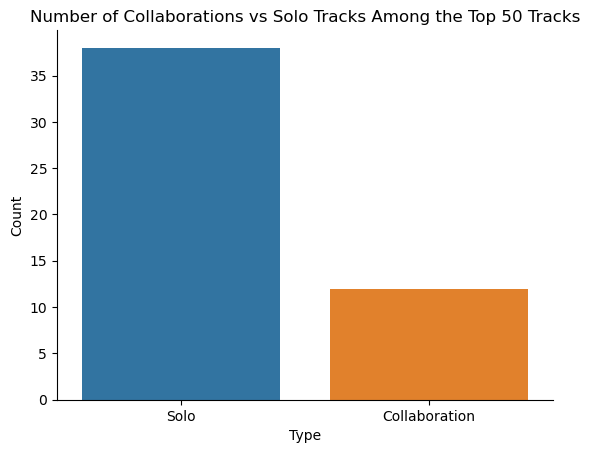

In [58]:
spotify_df['collaboration'] = spotify_df['track_name'].apply(lambda x: 'Collaboration' if 'feat' in x or 'with' in x else 'Solo')

collaboration_counts = spotify_df['collaboration'].value_counts()
ax = sns.barplot(x=collaboration_counts.index, y=collaboration_counts.values)
plt.title('Number of Collaborations vs Solo Tracks Among the Top 50 Tracks')
plt.xlabel('Type')
plt.ylabel('Count')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [59]:
spotify_df['collaboration'] = spotify_df['track_name'].apply(lambda x: 'Collaboration' if 'feat' in x or 'with' in x else 'Solo')

collaboration_percentage = (spotify_df['collaboration'] == 'Collaboration').mean() * 100
collaboration_percentage

24.0

> 24% of all tracks include a collaboration. [One analysis](https://news.distrokid.com/the-rise-of-collaborations-in-todays-music-8a8bcd386ea) of over 1.2 million songs found that "the number of songs that feature a collaboration more than doubled over the past two years, from 5% to 11%". This is far below what we have in our dataset, making this an interesting insight!

### How does danceability correlate with energy among the top-ranked songs?

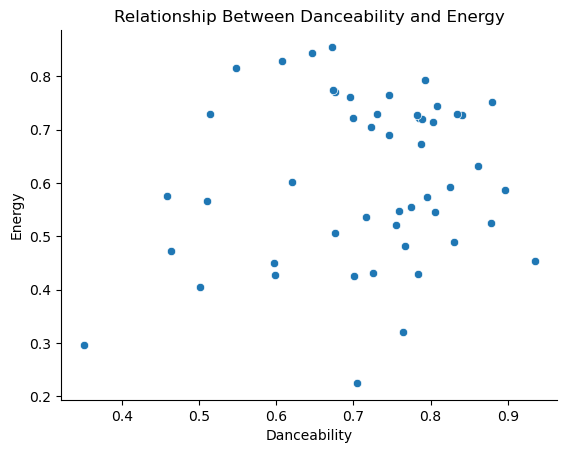

0.1525517218405709

In [41]:
ax = sns.scatterplot(x='danceability', y='energy', data=spotify_df)
plt.title('Relationship Between Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

dance_energy_corr = spotify_df['danceability'].corr(spotify_df['energy'])
dance_energy_corr

> The scatter plot and correlation coefficient (approximately 0.153) indicate a slight positive correlation between danceability and energy. This means that, to some extent, songs with higher danceability tend to have higher energy levels, but the relationship is not very strong.

### What are the most popular genres?

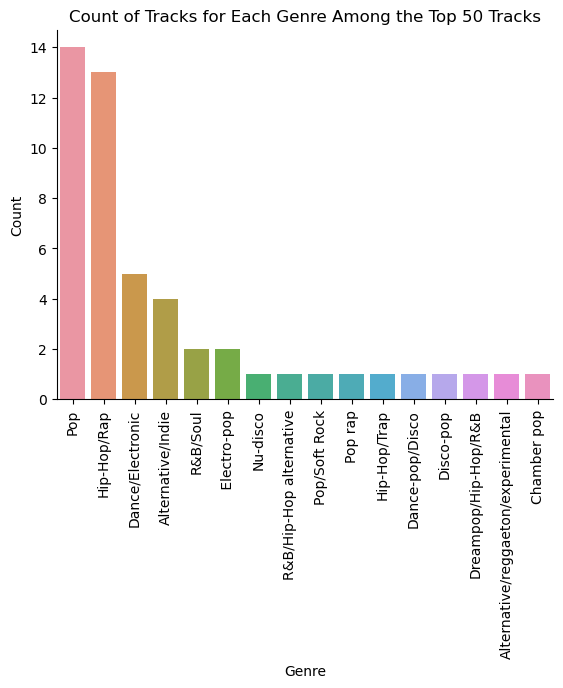

In [60]:
genre_counts = spotify_df['genre'].value_counts()
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Count of Tracks for Each Genre Among the Top 50 Tracks')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.xticks(rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### What is the distribution of loudness across different genres?

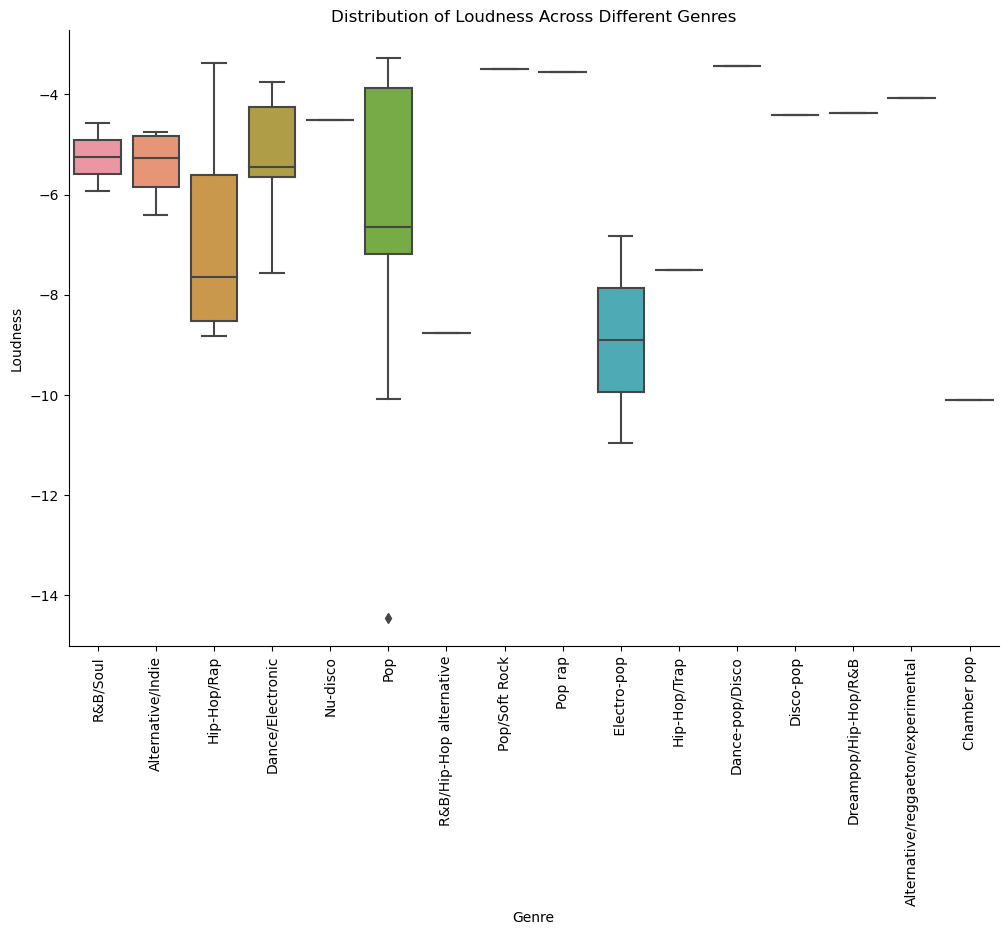

In [43]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='genre', y='loudness', data=spotify_df)
plt.title('Distribution of Loudness Across Different Genres')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Loudness')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Is there a significant difference in tempo between Pop and Hip-Hop genres?

In [51]:
from scipy.stats import ttest_ind

pop_tempo = spotify_df[spotify_df['genre'] == 'Pop']['tempo']
hiphop_tempo = spotify_df[spotify_df['genre'].str.contains('Hip-Hop')]['tempo']

# Performing a t-test
t_stat, p_value = ttest_ind(pop_tempo, hiphop_tempo, equal_var=False)

# Result of the t-test
p_value

0.797929622061473

> The p-value of approximately 0.798 suggests that there is no significant difference in tempo between the Pop and Hip-Hop genres in this dataset. The null hypothesis (that the means are equal) cannot be rejected at the conventional significance levels.

### How does the duration of a track relate to its rank?

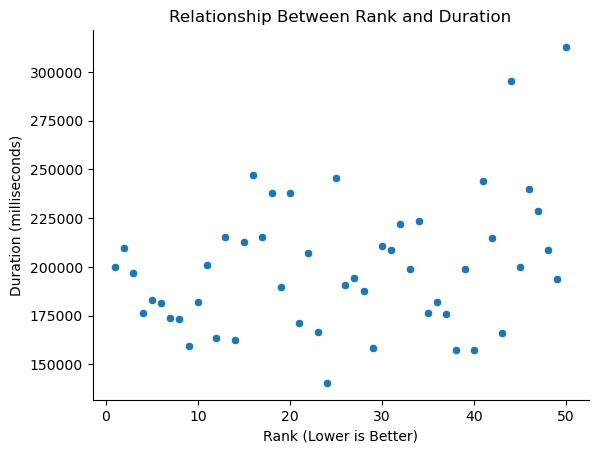

In [52]:
ax = sns.scatterplot(x='rank', y='duration_ms', data=spotify_df)
plt.title('Relationship Between Rank and Duration')
plt.xlabel('Rank (Lower is Better)')
plt.ylabel('Duration (milliseconds)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> The scatter plot does not show a clear trend between the duration of a track and its rank. There appears to be a wide range of durations across all ranks, indicating that the length of a song does not strongly influence its ranking in this dataset.

### Are acoustic tracks more likely to be in a specific genre?

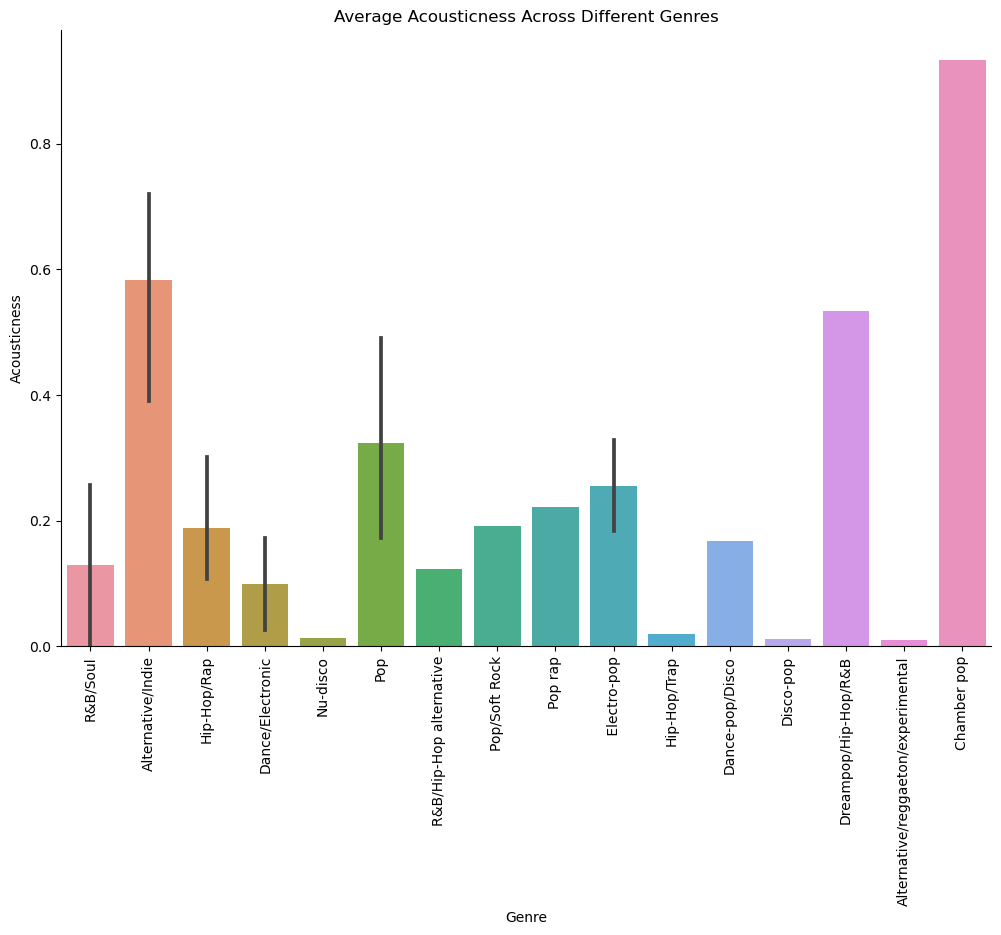

In [53]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='genre', y='acousticness', data=spotify_df)
plt.title('Average Acousticness Across Different Genres')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Acousticness')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> The bar plot shows the average acousticness across different genres. Some insights include:

- Genres like "Chamber pop" and "Dreampop/Hip-Hop/R&B" have higher acousticness levels, indicating that these genres may include more acoustic tracks.
- Genres like "Dance-pop" and "Disco-pop" have lower acousticness levels, suggesting fewer acoustic elements.

### Are louder tracks more likely to be in a specific genre?

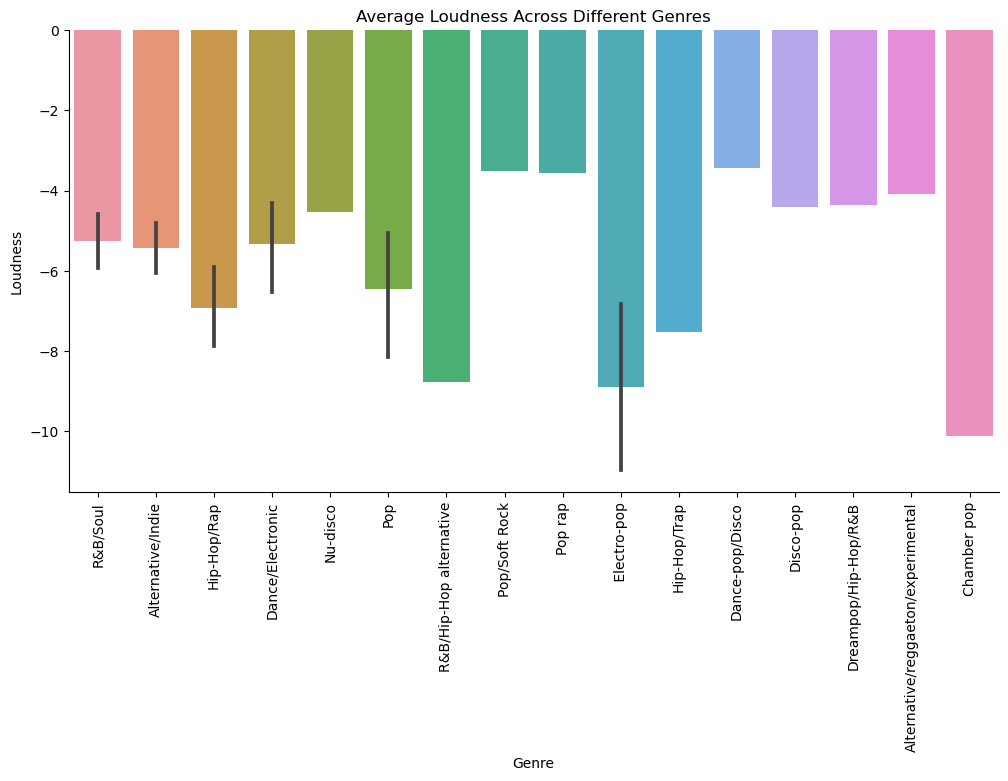

In [57]:
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='genre', y='loudness', data=spotify_df)
plt.title('Average Loudness Across Different Genres')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Loudness')


ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

> There does appear to be a pattern between the loudness and music genre. 

- Genres such as "Chamber pop", "Electro-pop", and "R&B/Hip-Hop alternative" tend to have lower loudness. 
- Genres such as "Dance-pop/Disco", "Pop/Soft Rock" and "Pop rap" have higher loudness levels, indicating higher average loudness levels. 

### Is there a relationship between the key of the song and its valence (positivity)?

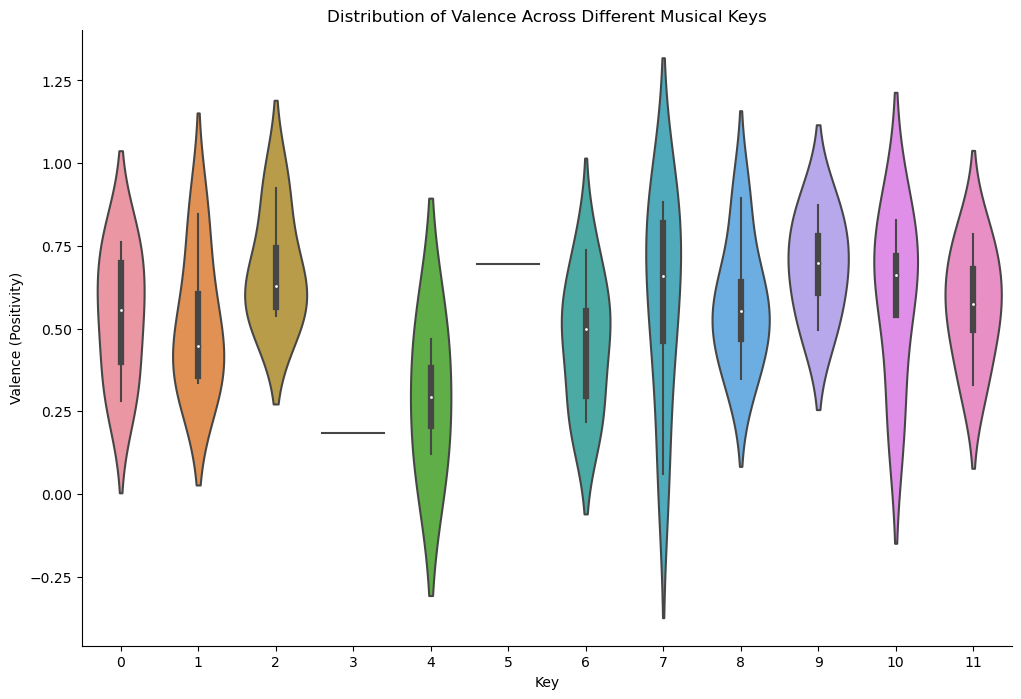

In [49]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x='key', y='valence', data=spotify_df)
plt.title('Distribution of Valence Across Different Musical Keys')
plt.xlabel('Key')
plt.ylabel('Valence (Positivity)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> The violin plot shows the distribution of valence (positivity) across different musical keys. While there are some variations, there doesn't appear to be a strong relationship between the key of the song and its valence. The distribution of valence seems relatively similar across different keys.

### What is the relationship between liveness and rank? (Ordinal vs. Continuous)

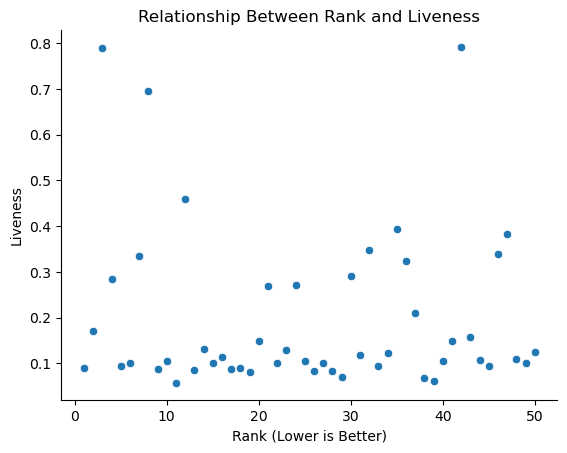

In [47]:
ax = sns.scatterplot(x='rank', y='liveness', data=spotify_df)
plt.title('Relationship Between Rank and Liveness')
plt.xlabel('Rank (Lower is Better)')
plt.ylabel('Liveness')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> The scatter plot does not show a clear trend between liveness and rank. Liveness levels seem to vary widely across all ranks, indicating that the presence of live recording does not strongly influence the ranking of a song in this dataset.

### How does instrumentalness vary between albums? 

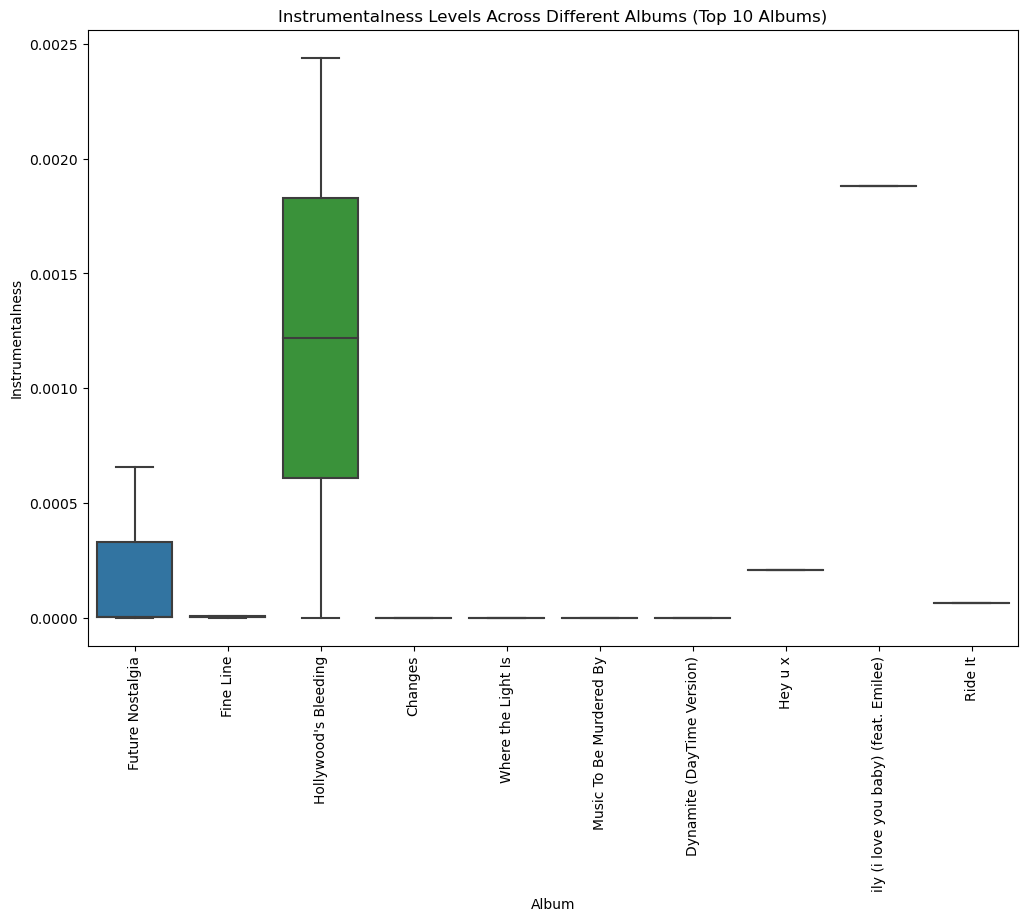

In [54]:
top_albums = spotify_df['album'].value_counts().index[:10]

plt.figure(figsize=(12, 8))
sns.boxplot(x='album', y='instrumentalness', data=spotify_df[spotify_df['album'].isin(top_albums)])
plt.title('Instrumentalness Levels Across Different Albums (Top 10 Albums)')
plt.xticks(rotation=90)
plt.xlabel('Album')
plt.ylabel('Instrumentalness')
plt.show()

> Intrestingly the instrumentalness is fairly low for the top 10, let's look at all of the tracks in our data set and see if this holds. 

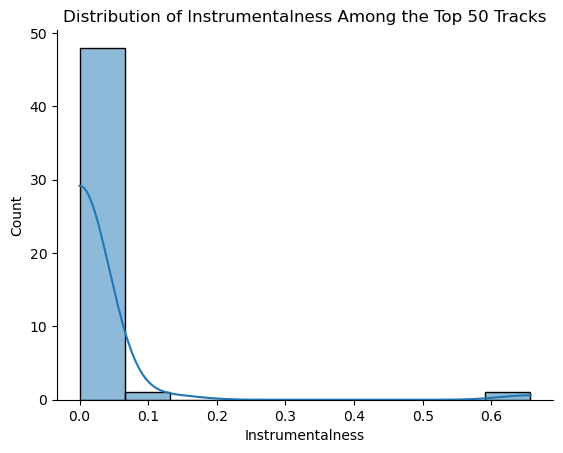

In [55]:
ax = sns.histplot(spotify_df['instrumentalness'], bins=10, kde=True)
plt.title('Distribution of Instrumentalness Among the Top 50 Tracks')
plt.xlabel('Instrumentalness')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Okay! We can see that generally speaking for all of the tracks in the dataset, the instrumentalness is low. 

### Is there a trend between tempo and danceability for top-ranking songs?

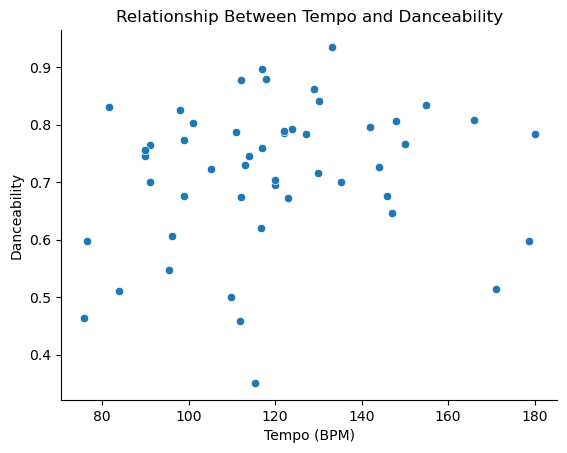

0.16895565119277522

In [45]:
ax = sns.scatterplot(x='tempo', y='danceability', data=spotify_df)
plt.title('Relationship Between Tempo and Danceability')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Danceability')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

tempo_dance_corr = spotify_df['tempo'].corr(spotify_df['danceability'])
tempo_dance_corr

> The scatter plot and correlation coefficient (approximately 0.169) indicate a slight positive correlation between tempo and danceability. This means that, to a small extent, songs with faster tempos tend to be more danceable. However, the relationship is not very strong, and there are many exceptions.

### Is there a pattern between song duration and rank?

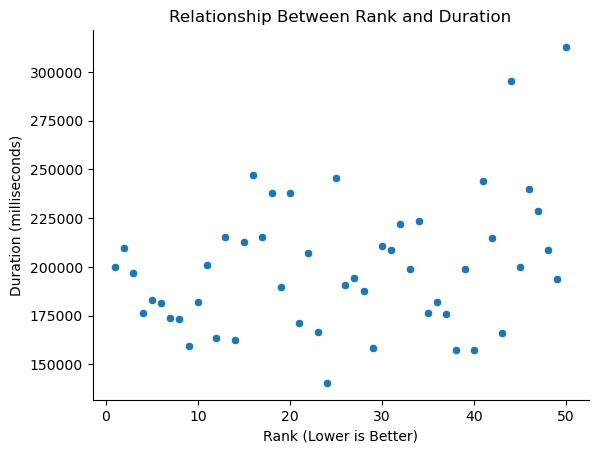

In [56]:
ax = sns.scatterplot(x='rank', y='duration_ms', data=spotify_df)
plt.title('Relationship Between Rank and Duration')
plt.xlabel('Rank (Lower is Better)')
plt.ylabel('Duration (milliseconds)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> My original inclination was to think that perhaps shorter songs would be higher on the ranking as they are easier to listen to more times on repeat, but no such correlation exists. 

### What does energy look like across genres?

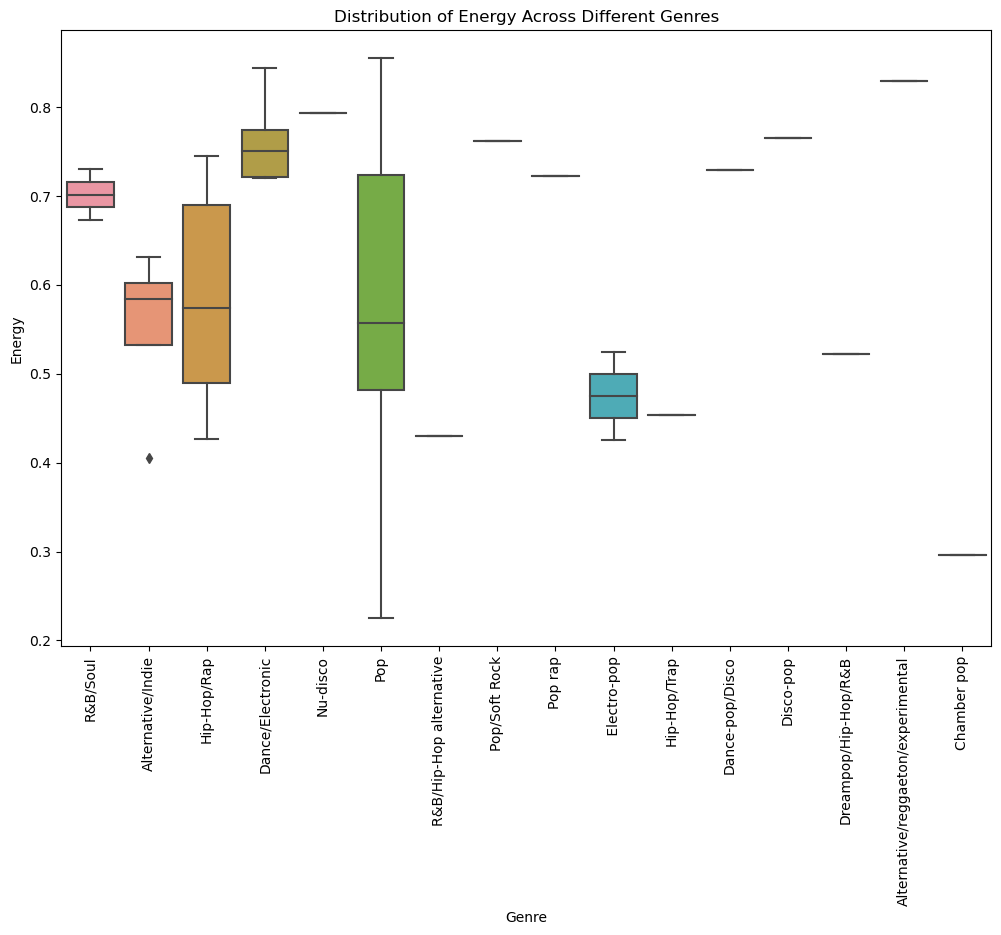

In [62]:
feature_to_analyze = 'energy'

plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y=feature_to_analyze, data=spotify_df)
plt.title(f'Distribution of {feature_to_analyze.capitalize()} Across Different Genres')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel(feature_to_analyze.capitalize())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Pop has the widest range of energy while other genres seem to be more defined and fall within specifications. 

## What can we see if we look at data correlations? 

In [26]:
df_corr = spotify_df.copy()

In [28]:
df_corr.columns

Index(['rank', 'artist', 'album', 'track_name', 'energy', 'danceability',
       'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre',
       'duration_min_sec'],
      dtype='object')

In [29]:
df_corr.drop(['duration_min_sec', 'rank'], axis=1, inplace=True)

In [30]:
df_corr.columns

Index(['artist', 'album', 'track_name', 'energy', 'danceability', 'key',
       'loudness', 'acousticness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')

In [31]:
corr = df_corr.corr()

Text(0.5, 1.0, 'Correlations')

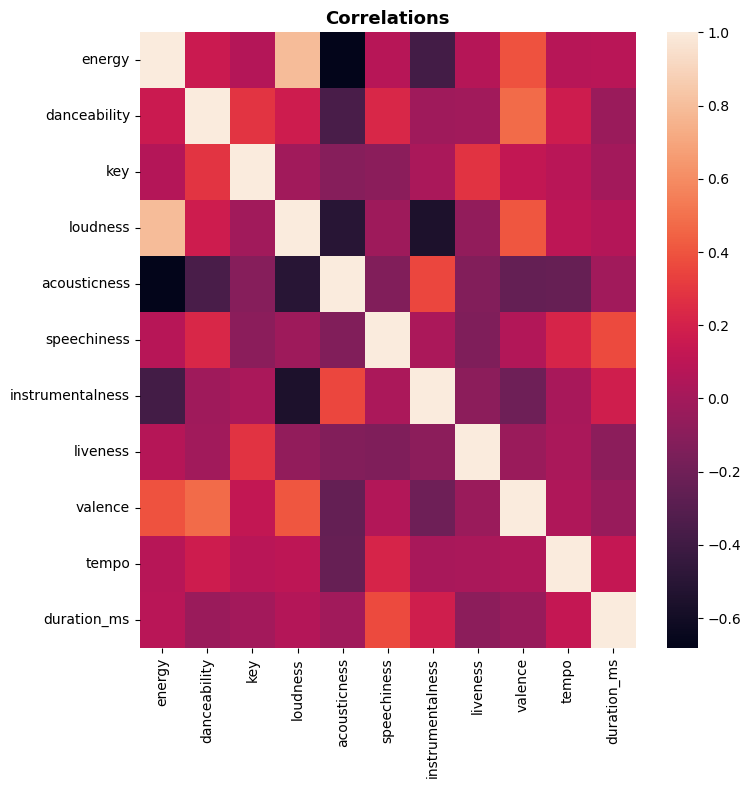

In [33]:
# Configuring the size of the plot. 
plt.figure(figsize=(8, 8))

# Calling the heatmap and passing the data we prepared through it.
ax = sns.heatmap(corr)

# Adds a title to our plot
ax.set_title('Correlations', fontdict={'size': 13, 'weight': 'semibold'})

> The strongest correlations we have are loudness and energy, which makes sense that a more energetic song would be louder, as well as acoustiness and energy forming a moderate negative correlation, which again makes sense for a more acoustic song to have less energy. 

> Valence is moderately correlated to energy, danceability and loudness. While loudness is negatively correlated to both acousticness and instrumentalness. This is also in line with what I would expect for valence, an attribute which measures the perceived emotional quality of a track, and loudness. 

> Let's look at the correlations mathimatically to ensure we didn't miss anything. 

In [35]:
# Features that are strongly positively correlated
positive_correlations = spotify_df[continuous_variables].corr().stack().reset_index()
strongly_positive_corr = positive_correlations[
    (positive_correlations[0] > 0.7) & (positive_correlations['level_0'] != positive_correlations['level_1'])
]

strongly_positive_corr

,level_0,level_1,0
3,energy,loudness,0.79164
30,loudness,energy,0.79164


In [36]:
# Features that are strongly negatively correlated
strongly_negative_corr = positive_correlations[
    (positive_correlations[0] < -0.7) & (positive_correlations['level_0'] != positive_correlations['level_1'])
]

strongly_negative_corr


,level_0,level_1,0


In [37]:
# Features that are not correlated
not_correlated = positive_correlations[
    (positive_correlations[0] > -0.1) & (positive_correlations[0] < 0.1) & (positive_correlations['level_0'] != positive_correlations['level_1'])
]

not_correlated

,level_0,level_1,0
2,energy,key,0.062428
5,energy,speechiness,0.074267
7,energy,liveness,0.069487
9,energy,tempo,0.075191
16,danceability,instrumentalness,-0.017706
17,danceability,liveness,-0.006648
20,key,energy,0.062428
23,key,loudness,-0.009178
25,key,speechiness,-0.094965
26,key,instrumentalness,0.020802
